In [42]:
import sys
import ipywidgets as widgets

sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append("/Users/octavia/Dropbox/SVE_v2/model")

my_modules = ['plot_functions','load_model_output', 'search_functions', 
              'plot_3D_functions', 'input_veg']
for mod in my_modules:
    if mod in sys.modules: 
        del sys.modules[mod]

from plot_functions import *
from plot_3D_functions import *
from search_functions import *
from load_model_output import *
from input_veg import *

In [43]:
project_dir = "/Users/octavia/Dropbox/SVE_v2/" 

## Current

In [44]:
summary = summarize_param_files(project_dir)
summary.loc[["Lx", "Ly", "imodel", "Ks", "H_i", "veg_type", "topo"]].T


,Lx,Ly,imodel,Ks,H_i,veg_type,topo
test_stripe_dt_dx,30,4,1,5,0,stripe,plane
test_GW_GA,50,5,1,"[1.0, 2.0, 3.0]","[-0.1, -0.05, 0]",randv,plane
test_veg,NaN,NaN,1,1,0,from_file,plane
test_inflow_dx,50,4,1,5,0,randv,plane
test_GA_infl,20,10,1,"[1.0, 5.0]","[-0.05, -0.1]",randv,plane
test_topo_gauss,40,40,1,1,0,randv,gaussian
test_GW_phil,50,5,2,"[0.0, 0.1, 1.0, 2.0, 3.0]",0,randv,plane
test_inflow,50,4,1,5,0,randv,plane
test_topo,NaN,NaN,1,1,0,randv,from_file
test_stripe,100,4,1,5,"[0.0, -0.01, -0.1]",stripe,plane


## Chose a case


In [45]:
dirs = os.listdir(os.path.join(project_dir , 'model_output/'))
dirs = list(set(dirs) - {'.DS_Store'})

select_base_name = widgets.Dropdown(
    options=dirs,
    description='base_name:',
    disabled=False,
)
select_base_name

Dropdown(description='base_name:', options=('test_topo', 'test_inflow_dt', 'test_topo_gauss', 'test_GW_GA', 't…

In [52]:
base_name = select_base_name.value
base_dir = os.path.join(project_dir, 'model_output', base_name )
print(base_name)
print_input_params(base_dir, [ 'Lx', 'Ly', 'tr', 'dt_print', "tmax_scale"])

test_topo_gauss
batch:
	p : 2.0
sim:
	m_scale : 1, 5
	m_sigma : 2, 10
common:
	H_i : 0.0
	Lx : 40
	Ly : 40
	tr : 5
	dt_print : 10
	tmax_scale : 2


In [49]:
core = load_sims(base_dir)
# core = patchy_update(core)

In [50]:
core[['t_final', 'runtime_hr']]

,t_final,runtime_hr
"p-2.0/m_scale-5,m_sigma-2/",600,0.644406
"p-2.0/m_scale-5,m_sigma-10/",600,0.638402
"p-2.0/m_scale-1,m_sigma-10/",600,0.601558
"p-2.0/m_scale-1,m_sigma-2/",600,0.602724


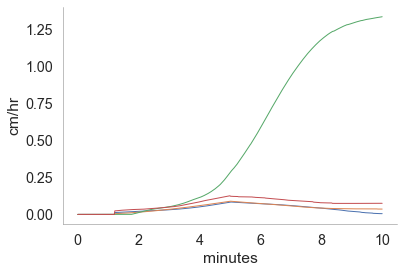

In [53]:
fig = plot_hydrographs(core[:20])

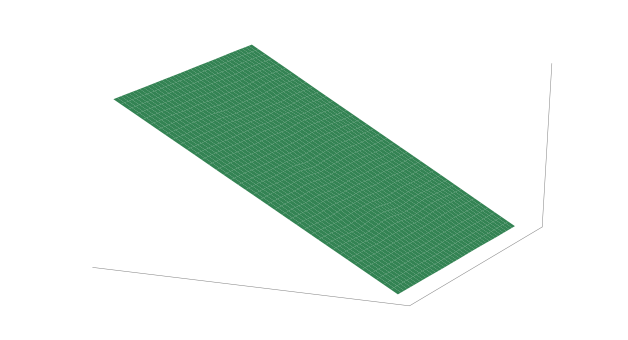

In [54]:
sim = core.iloc[0]
plot_3D_veg(sim);

In [61]:
core.infl_frac

p-2.0/m_scale-5,m_sigma-2/     0.911722
p-2.0/m_scale-5,m_sigma-10/    0.888806
p-2.0/m_scale-1,m_sigma-10/    0.810489
p-2.0/m_scale-1,m_sigma-2/     0.851268
Name: infl_frac, dtype: float64

In [59]:
sim = core.iloc[2]
if sim.fV < 1:
    triptych(sim)

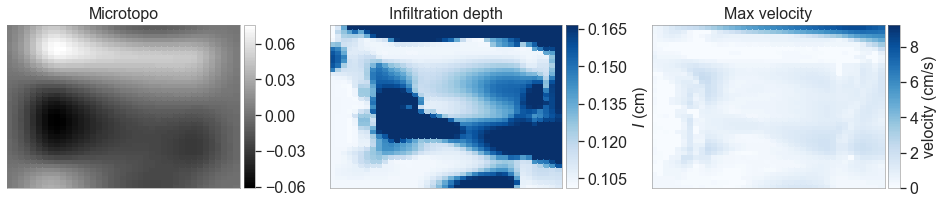

In [60]:
if sim.topo != "plane":
        triptych_micro(sim)